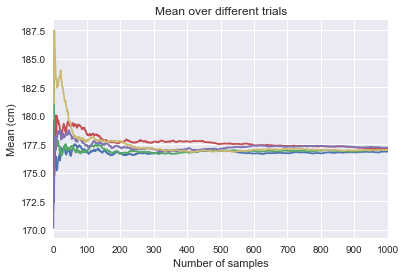

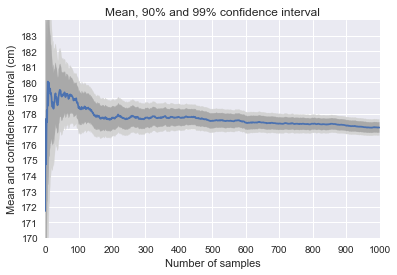

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

def ConfidenceInterval(values, ci=0.95):
    '''Calculate confidence interval of a list of numbers using T distribution.

    Args:
      values: a valid parameter for a numpy array construction.
      ci: confidence interval, must be 0 ≤ ci ≤ 1.
    Returns:
      (lower_bound, upper_bound) tuple.
    '''
    if ci <= 0 or ci >= 1:
        raise ValueError('ci must be 0 < ci < 1')
    x = np.array(values)
    n = len(x)                           # Number of samples
    x_hat = x.mean()                     # Sample mean
    s = x.std()                          # Sample standard variation
    t_star = stats.t.isf((1-ci)/2, n-1)  # Critical value
    margin = t_star * s / np.sqrt(n)
    lb = x_hat - margin                  # Confidence interval lower bound
    ub = x_hat + margin                  # Confidence interval upper bound
    return lb, ub


def plotSamples(samples, name_suffix):
    fig, ax = plt.subplots()
    ax.hist(samples, bins=20, rwidth=0.9)
    mean = samples.mean()
    ax.set_title('Mean: %.2fcm' % mean)
    ax.axvline(mean, linestyle='--', color='k')
    ax.set_ylabel('Number of samples')
    ax.set_xlabel('Height (cm)')
    ax.set_xlim(177-20, 177+20)
    ax.set_ylim(0, 10)
    fig.savefig('random_normal_sample_%s.svg' %name_suffix)


def runningMean(l):
    tot = 0.0
    res = []
    for i, e in enumerate(l):
        tot += e
        res.append(tot/(i+1))
    return np.array(res)

def runningCi(l, ci=0.95):
    ubs = []
    lbs = []
    for i in range(1, len(l)):
        lb, ub = ConfidenceInterval(l[:i], ci)
        ubs.append(ub)
        lbs.append(lb)
    return lbs, ubs


def plotAverages(ss):
    fig, ax = plt.subplots()
    ax.set_title('Mean over different trials')
    ax.set_ylabel('Mean (cm)')
    ax.set_xlabel('Number of samples')
    for samplerun in ss:
        rm = runningMean(samplerun[:1000])
        ax.plot(rm)
    ax.set_xlim(0, 1001)
    ax.xaxis.set_ticks(np.arange(0, 1001, 100))
    fig.savefig('multiple_trials.svg')


def plotConfidenceInterval(ss):
    fig, ax = plt.subplots()
    ax.set_title('Mean, 90% and 99% confidence interval')
    ax.set_xlabel('Number of samples')
    ax.set_ylabel('Mean and confidence interval (cm)')
    shortSample = ss[:1000]
    rm = runningMean(shortSample)
    lbs90, ubs90 = runningCi(shortSample, ci=.90)
    lbs99, ubs99 = runningCi(shortSample, ci=.99)
    ax.plot(rm)
    
    ax.fill_between(range(1, len(shortSample)), lbs99, ubs99, color='lightgray')
    ax.fill_between(range(1, len(shortSample)), lbs90, ubs90, color='darkgray')
    ax.set_ylim(177-7, 177+7)
    ax.yaxis.set_ticks(np.arange(170, 184))
    ax.set_xlim(0, 1001)
    ax.xaxis.set_ticks(np.arange(0, 1001, 100))
    fig.savefig('confidence_interval_increasing_samples.svg')


plt.rcParams['font.family'] = "roboto"
sns.set()
mu, sigma = 177.1, 6.5
np.random.seed(377)
s = np.random.normal(mu, sigma, 1000000)
for i in range(3):
    #plotSamples(np.random.choice(s, 50), str(i+1))
    pass
    
subsamples = [np.random.permutation(s) for _ in range(5)]
plotAverages(subsamples)
plotConfidenceInterval(subsamples[2])